## VPLIV LEGALIZACIJE NA SOCIALNO DEPRIVACIJO
Legalizacija konoplje je kompleksen družbeni fenomen, ki lahko vpliva na stopnjo socialne deprivacije v družbi. Socialna deprivacija je stanje, v katerem posameznik nima zadostnih sredstev ali priložnosti za vključitev v družbo, kar vodi v omejen dostop do osnovnih dobrin, storitev in priložnosti. Projekt bo raziskoval, kako se brezdomstvo, kriminal in brezposelnost povezujejo z legalizacijo konoplje ter kako se sami dejavniki socialne deprivacije vplivajo drug na drugega.


### 1. PRIKAZ ZVEZNIH DRŽAV NA MAPI, GLEDE NA KATEGORIJO LEGALIZACIJO
##### 1.1 OPIS PODATKOV
Podatki o legalizaciji marihuane v ZDA so bili pridobljeni iz vira MJBizDaily in zajemajo informacije o legalizaciji marihuane, vključno z medicinsko in rekreacijsko uporabo, projekcijami prodaje konoplje in multistate operaterji.
Namen teh podatkov je bilo zagotavljanje informacij o legalizaciji marihuane, vključno z medicinsko in rekreacijsko uporabo, projekcijami prodaje konoplje in multistate operaterji.
Podatki so v esedilni podatki v obliki tabele, ki vsebujejo podrobnosti o legalizaciji marihuane po državah. Vsebujejo 50 vrstic, torej za vsako zvezno državo in 6 stolpcev (State, Code, Recreational, Year legalized (Rec), Medical in Year legalizeded).

##### 1.2 OPIS ANALIZE
Na podlagi podatkov iz datoteke legalization.csv smo s pomočjo orodja IPwidgets prikazali, kako se je kategorizacija legalizacije konoplje spreminjala v posameznih zveznih državah od leta 1996, ko je prva zvezna država legalizirala konopljo, pa vse do danes.
Kategorija legalizacije:

- V celoti legalizirane: To so zvezne države, kjer je uporaba, posedovanje in prodaja konoplje povsem legalna pod določenimi pogoji.
- Rekreacijsko legalizirane: V teh zveznih državah je uporaba konoplje legalna za rekreacijske namene, kar pomeni, da ljudje lahko zakonito uživajo te substance brez medicinskega ali terapevtskega razloga.
- Medicinsko legalizirane: Zvezne države v tej kategoriji dovoljujejo uporabo konoplje izključno za medicinske in terapevtske namene pod nadzorom zdravstvenih strokovnjakov.
- Ni legalizirana: V teh zveznih državah so določene substance popolnoma prepovedane in so kaznovane z zakonodajo, ki se razlikuje od zvezne države do zvezne države.

Za prikaz legalizacije smo uporabili orodje IPWidgets, ki nam je omogočilo uporabo drsnika za izbiro različnih let. Tako smo lahko spremljali spremembe legalizacije konoplje skozi leta. Na zemljevidu ZDA smo prikazali posamezne zvezne države in njihovo kategorizacijo legalizacije.

##### 1.3 UGOTOVITVE
Leta 1996 je Kalifornija postala prva zvezna država v ZDA, ki je v celoti legalizirala konopljo za medicinsko in rekreativno uporabo. Leta 1998 so jo v celoti legalizirale Alaska, Nevada, Oregon in Washington. V nadaljnih eltih je vedno več zveznih držav legaliziralo konopljo, tiste ki jo niso v celoti pa so jo samo medicinsko (Arizona - 2010, Maine - 2005...). Danes, v letu 2024 pa ima: 

- 10 držav nima legalizirane konoplje
Idaho, Indiana, Kansas, Nebraska, North Carolina, South Carolina, Tennessee, Texas, Wisconsin, Wyoming

- 15 ima samo medicisnko legalizirano
Hawaii, New Hampshire, Georgia, Louisiana, Arkansas, Florida, North Dakota, Pennsylvania, Iowa, West Virginia, Oklahoma, Utah, Mississippi, South Dakota, Alabama, Kentucky

- 0 držav ima samo rekreativno legalizirano

- 24 držav ima v celoti legalizirano konopljo
California, Alaska, Nevada, Oregon, Washington, Maine, Colorado, Montana, Vermont, Rhode, Island, New Mexico, Michigan, Arizona, New Jersey, Delaware, Connecticut, Massachusetts, Illinois, Maryland, Minnesota, New York, Ohio, Missouri, Virginia

In [2]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import ipywidgets as widgets
from ipywidgets import interact, IntSlider
import numpy as np

In [3]:
states_csv = r"podatki/states.csv"
legalization_csv = r"podatki/legalization.csv"
df_states = pd.read_csv(legalization_csv)

kode_drzav = df_states["Code"].tolist()
seznam_drzav = df_states["State"].tolist()

def ime_drzave(koda):
    seznam_drzav = df_states["State"].tolist()
    kode_drzav = df_states["Code"].tolist()
    for ime, koda_el in zip(seznam_drzav, kode_drzav):
        if koda == koda_el:
            return ime
    return "Država ni bila najdena"



In [4]:
legalization_csv = r"podatki/legalization.csv"
df = pd.read_csv(legalization_csv)

# dictionary s podatki o legalizaciji
legalization_dict = {}
for year in range(1990, 2025):
    legalization_dict[year] = {
        "legalizirana": [],
        "legalizirana_rec": [],
        "legalizirana_med": [],
        "ni_legalizirana": []
    }

for index, row in df.iterrows():
    state = row['State']
    code = row['Code']
    rec = row['Recreational']
    med = row['Medical']
    year_rec = row['Year legalized (Rec)']
    year_med = row['Year legalized (Med)']
    
    for year in range(1990, 2025):
        
            if rec == "Yes" and med == "Yes":
                if year >= year_rec or year >= year_med:
                    legalization_dict[year]["legalizirana"].append([state, code, rec, med])
            elif rec == "Yes" and med != "Yes":
                if year >= year_rec or year >= year_med:
                    legalization_dict[year]["legalizirana_rec"].append([state, code, rec, med])
            elif rec != "Yes" and med == "Yes":
                if year >= year_rec or year >= year_med:
                    legalization_dict[year]["legalizirana_med"].append([state, code, rec, med])
            else:
                legalization_dict[year]["ni_legalizirana"].append([state, code, rec, med])

for year, data in legalization_dict.items():
    sez_kod = [state[1] for states in data.values() for state in states if states]
    for el in kode_drzav:
        if el not in sez_kod:
 
            legalization_dict[year]["ni_legalizirana"].append([ime_drzave(el), el, rec, med])


#for year, data in legalization_dict.items():
 #   print(f"Podatki za leto {year}:")
    i = 0
   # for category, states in data.items():
       # print(f"Kategorija: {category}")
        #for state in states:
         #   i +=1
          #  print(f"  {i}  Država: {state[0]}, Koda: {state[1]}, Recreational: {state[2]}, Medical: {state[3]}")


In [24]:
# Shapefile vsebuje geometrijo držav ZDA
us_map = gpd.read_file("States_shapefile-shp/States_shapefile.shx")
colors = {'legalizirana': 'green', 'legalizirana_rec': 'blue', 'legalizirana_med': 'orange', 'ni_legalizirana': 'red'}

def plot_map(year):
    fig, ax = plt.subplots(figsize=(15, 10))
    
    for category, state_list in legalization_dict[year].items():
        for state_info in state_list:
            state_name = state_info[0].upper()   # Get state name from the state_info list
            if state_name not in us_map['State_Name'].values:
                print(f"{state_name} not found in the map")
                print(us_map['State_Name'])
            else:
                us_map[us_map['State_Name'] == state_name].plot(ax=ax, color=colors[category], edgecolor='black')

    # Legend
    legend_labels = {'legalizirana': 'Fully Legalized', 'legalizirana_rec': 'Recreationally Legalized', 
                     'legalizirana_med': 'Medicinally Legalized', 'ni_legalizirana': 'Not Legalized'}
    handles = [plt.Rectangle((0,0),1,1, color=colors[category]) for category in legalization_dict[year].keys()]
    ax.legend(handles, legend_labels.values(), loc='lower left')
    
    # Set plot title
    ax.set_title(f'Legalization Status by State - Year {year}')

    # Show the map
    plt.show()

# Interaktivni drsnik
interact(plot_map, year=IntSlider(min=1996, max=2024, step=1, value=1996))





interactive(children=(IntSlider(value=1996, description='year', max=2024, min=1996), Output()), _dom_classes=(…

<function __main__.plot_map(year)>

### PRIKAZ ŠTEVILA BREZDOMCEV GLEDE NA LETO IN KATEGORIJO LEGALIZACIJE

In [6]:
def populacija(state_code, year):
    population_file = r"podatki/population.csv"
    df_population = pd.read_csv(population_file)
    for index_population, row_population in df_population.iterrows():
        year_population = row_population["Year"]
        state_population = row_population["Code"]
        value_population = row_population["Value"]
        if state_code == state_population and year_population == year:
            # Spremeni niz v število in odstrani vejico
            value_population = float(value_population.replace(",", "").replace(".",""))
            return value_population
    return None

In [7]:
dict_homeless = {}
dict_homeless_sum = {}

for i in range(2007, 2023):
    dict_homeless[i] = []
    dict_homeless_sum[i] = []  # Dodajte to vrstico
    excel_file_homelessness = r"podatki/homelessness.csv"
    df_homeless = pd.read_csv(excel_file_homelessness)
    for index_homeless, row_homeless in df_homeless.iterrows():
        home_year = row_homeless["Year"]
        state_code_homeless = row_homeless["State"]
  
        overall = row_homeless["Overall Homeless"]
        
        # pogoj ker homeless data do 2022
        if home_year == i and home_year != 2023:
            št_prebivalcev = populacija(state_code_homeless, home_year)
            procentno = (overall / št_prebivalcev) * 100
            
            # Dodamo podatke za vsako kategorijo iz legalization_dict, ki ustreza državi
            if i in legalization_dict:
                for k, v in legalization_dict[i].items():
                    for element in v:
                        state_name = element[0]
                        state_code = element[1]
                        if state_code == state_code_homeless:
                            dict_homeless[i].append([state_name, procentno, k])
                            dict_homeless_sum[i].append([overall, št_prebivalcev])
          


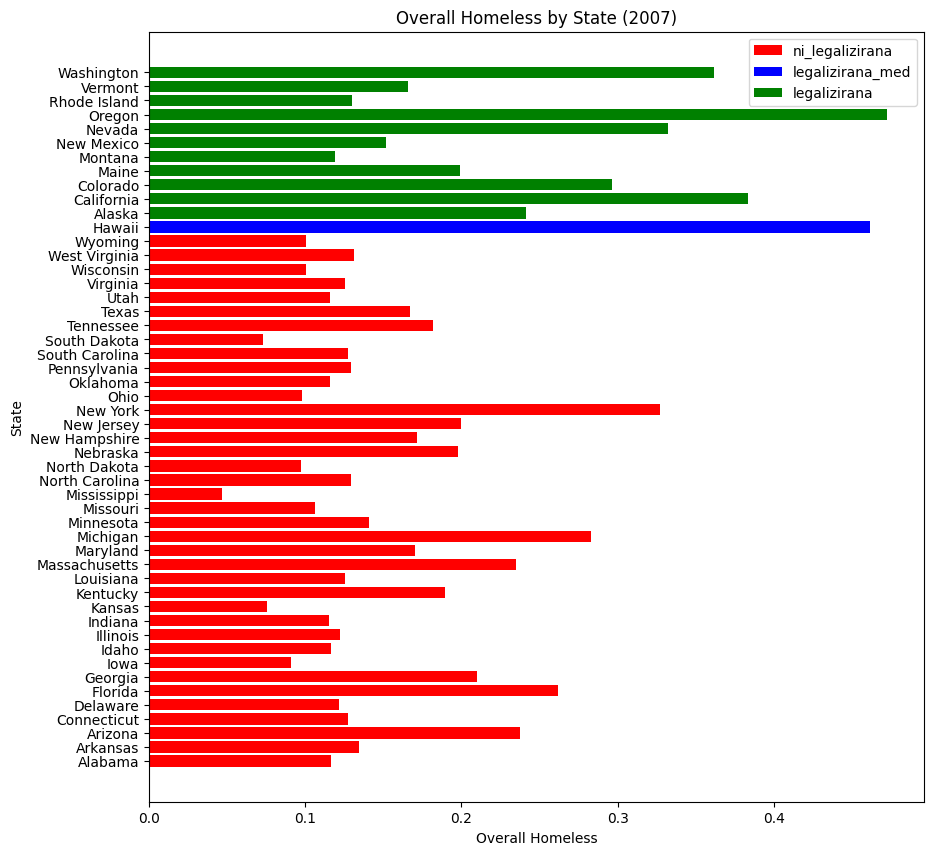

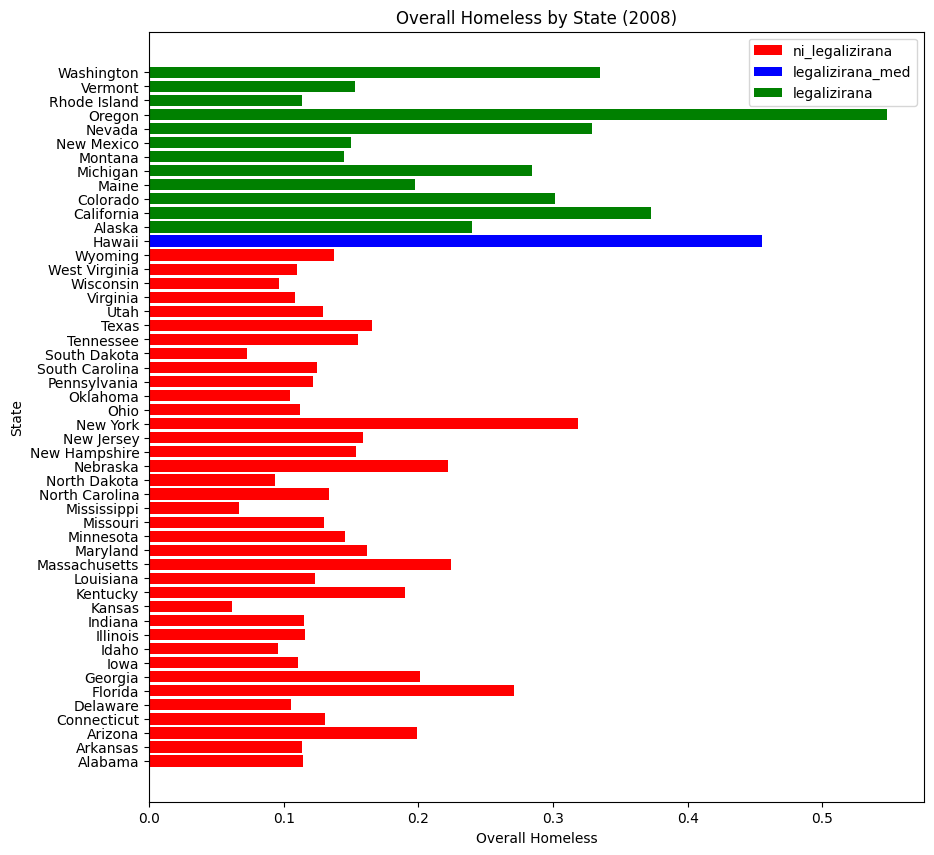

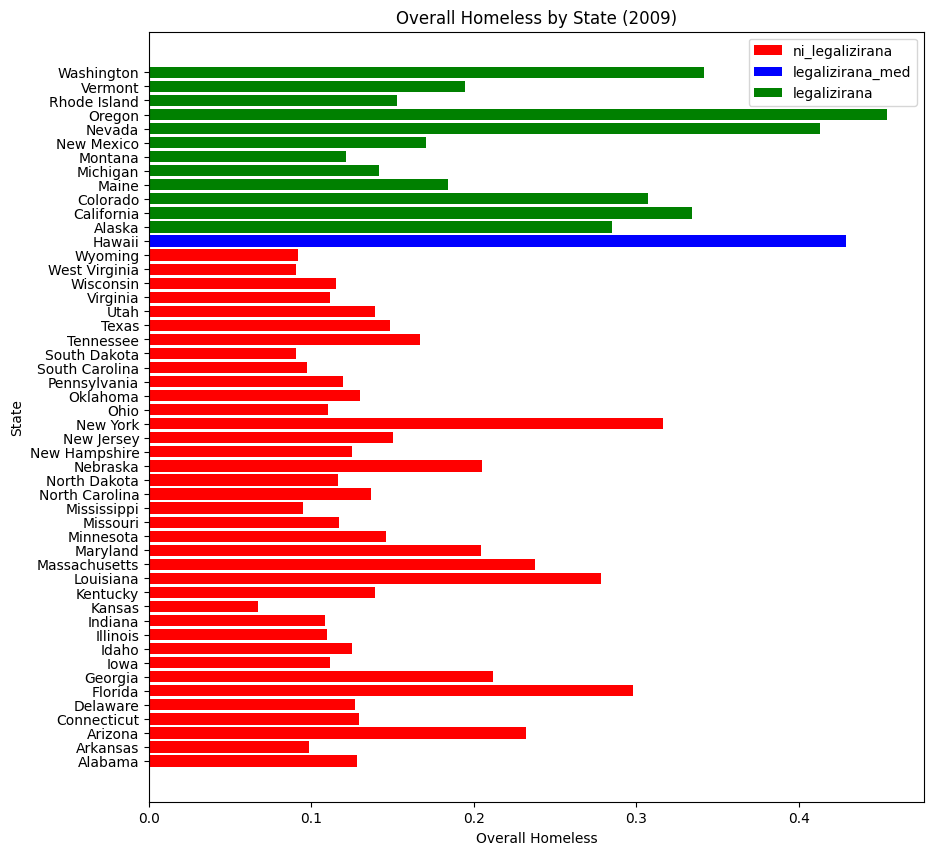

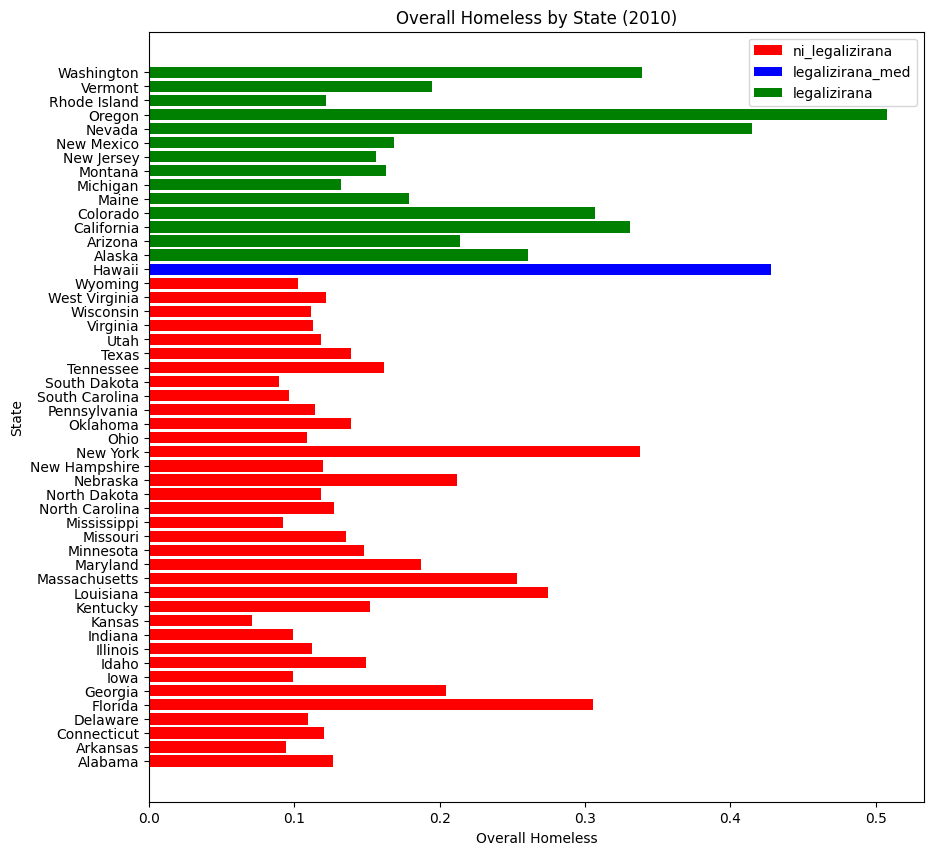

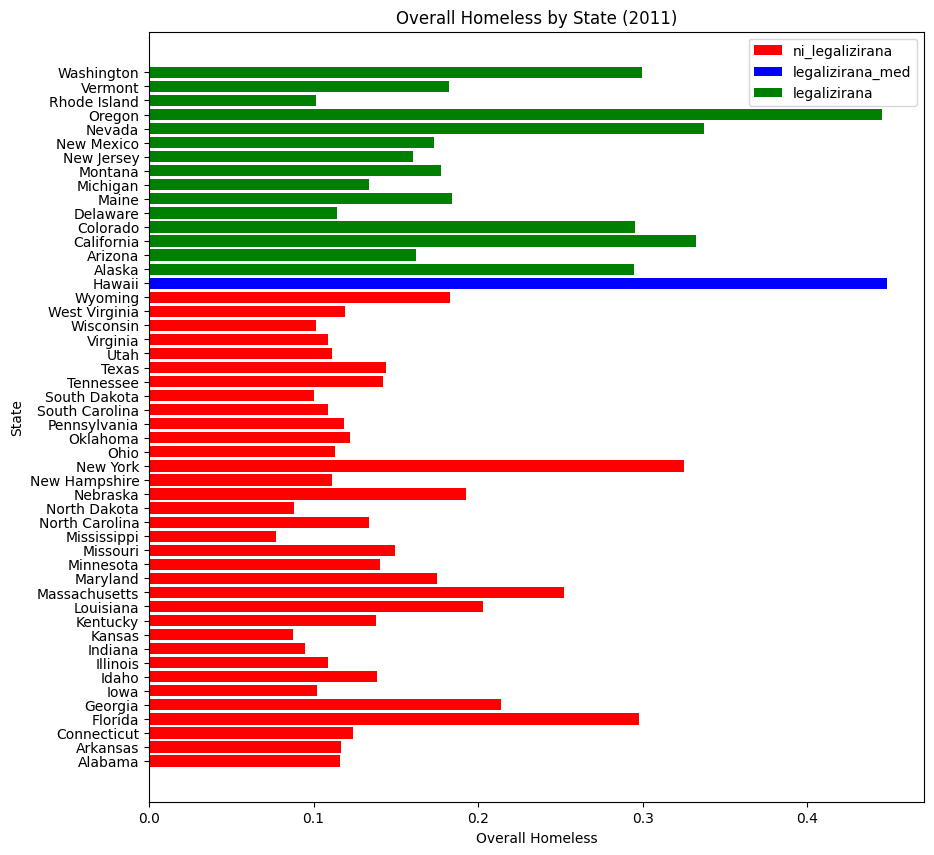

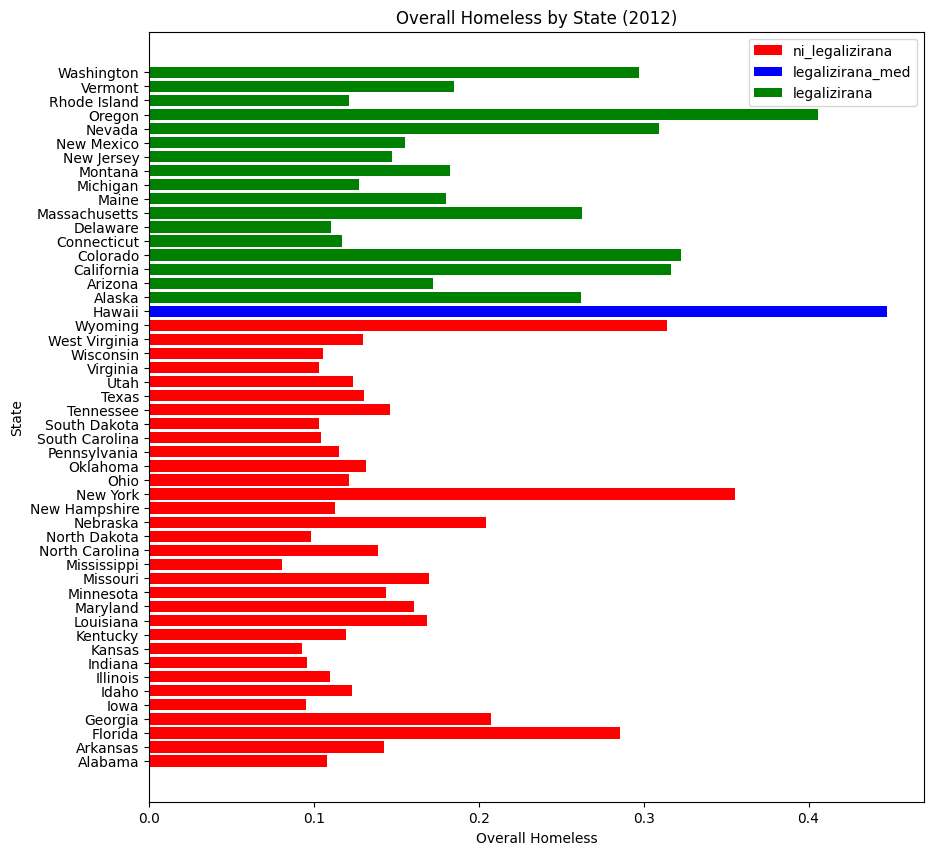

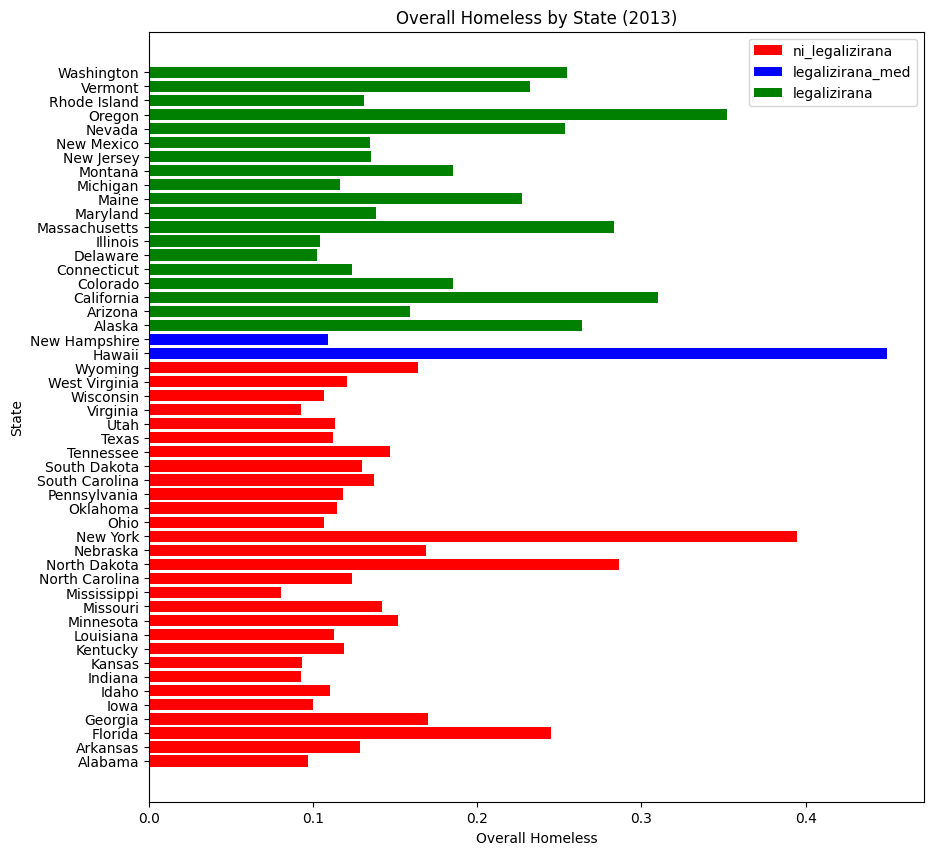

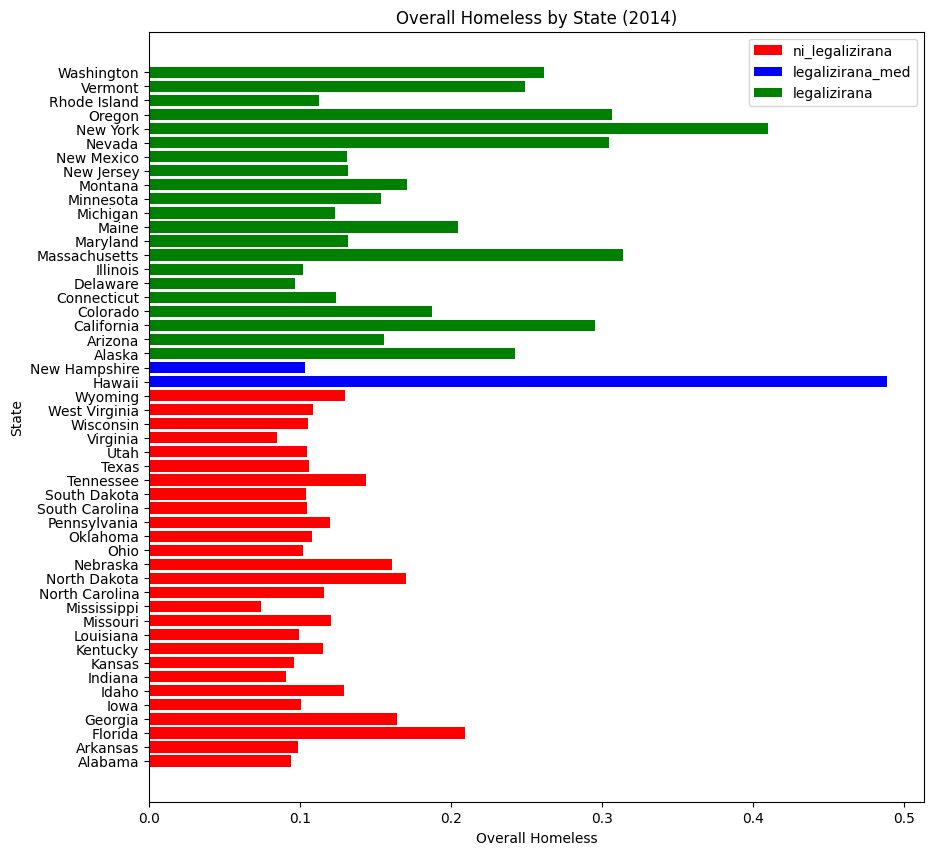

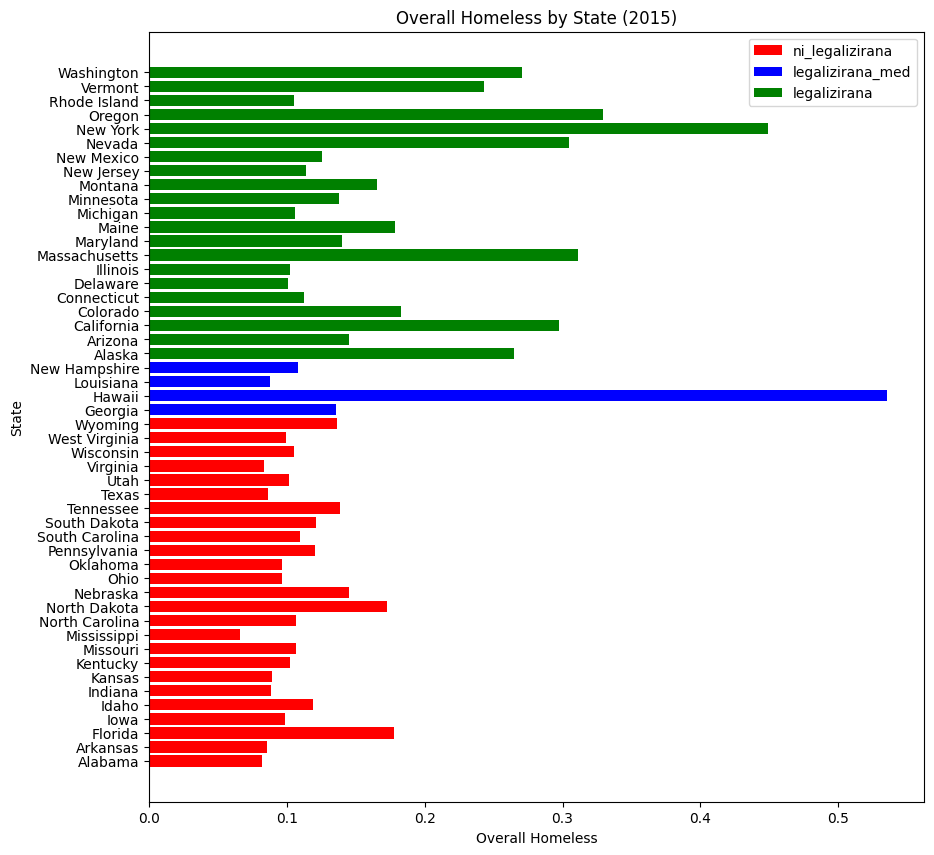

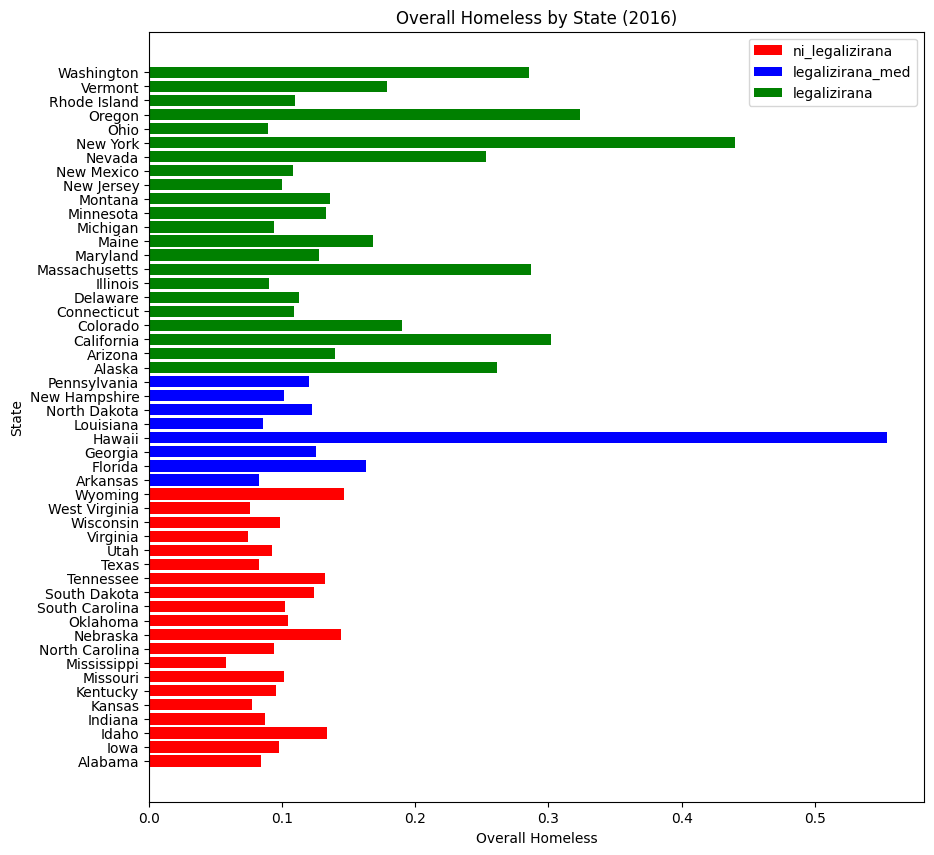

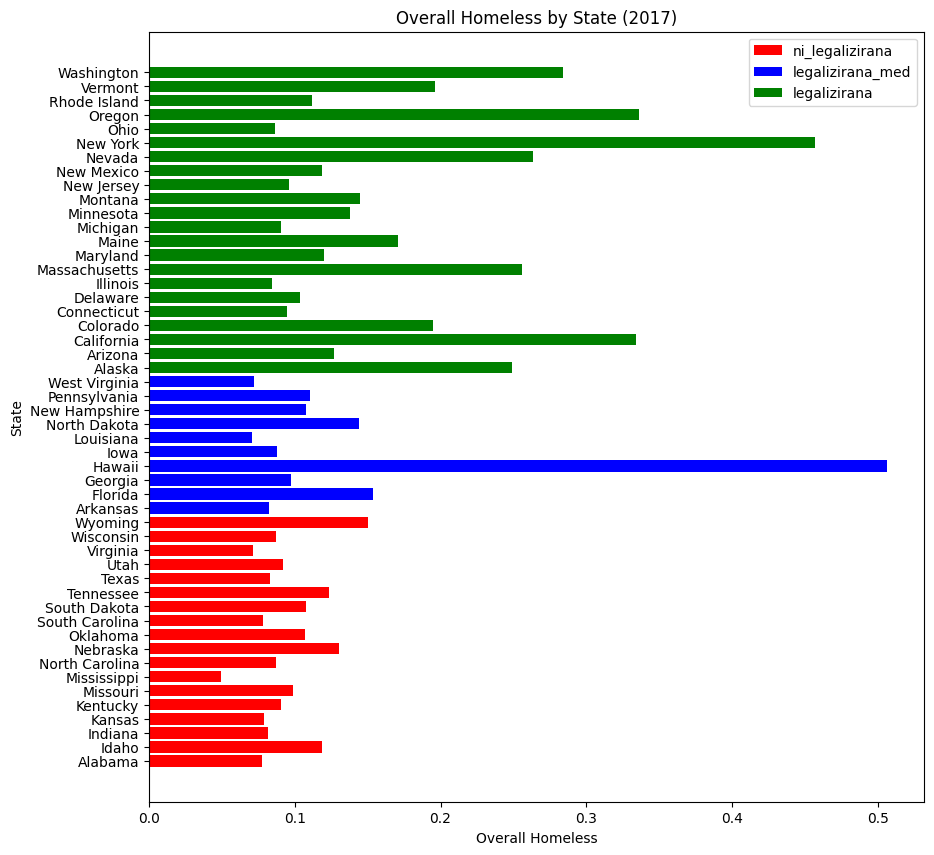

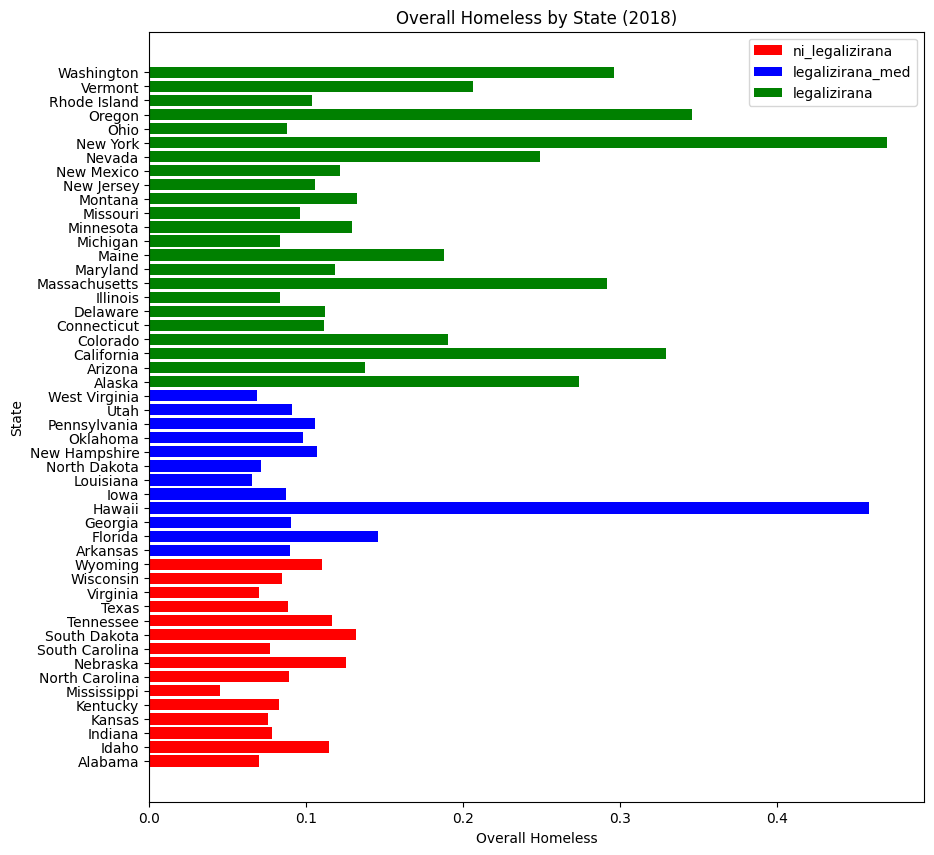

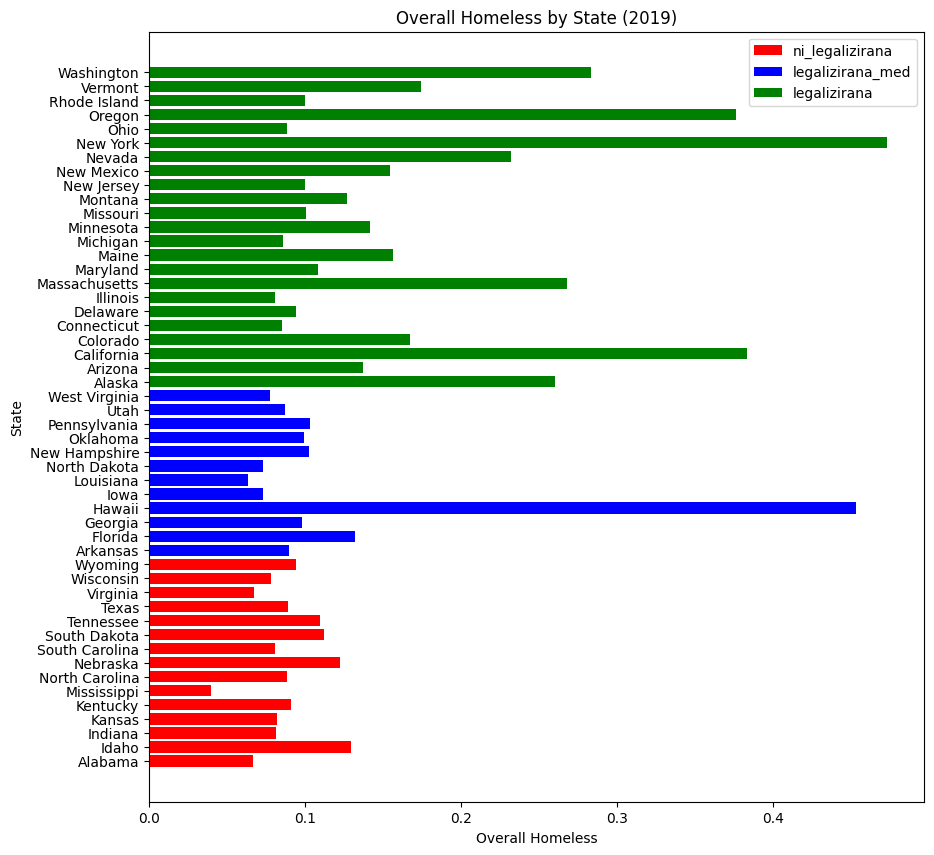

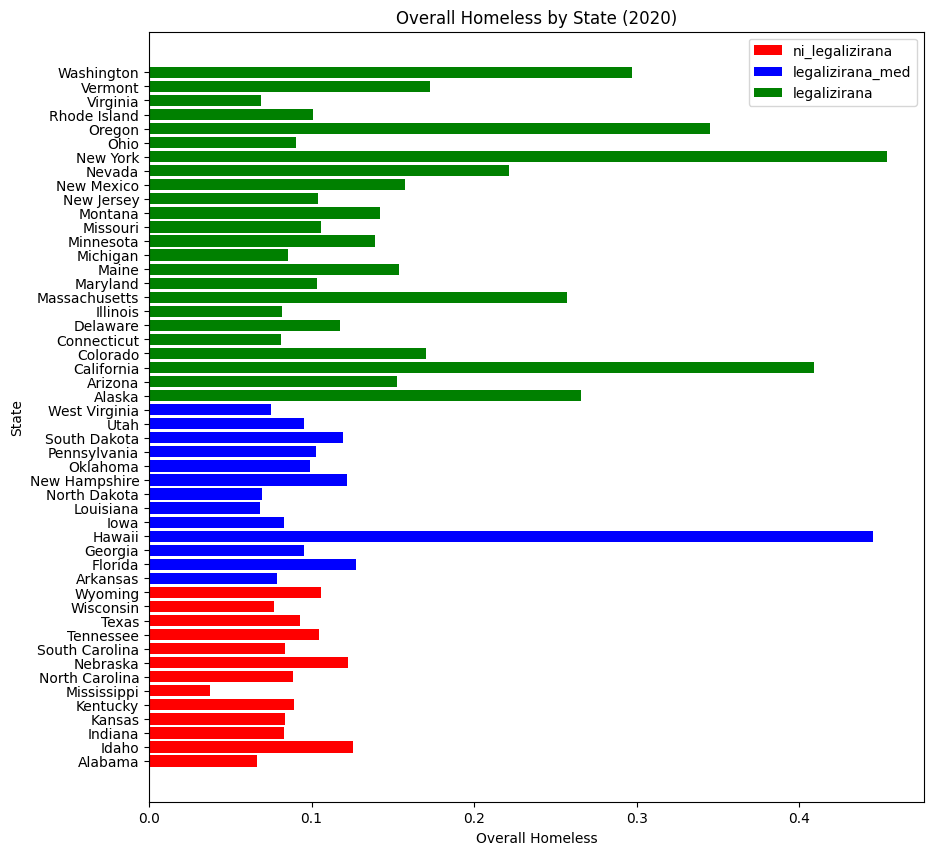

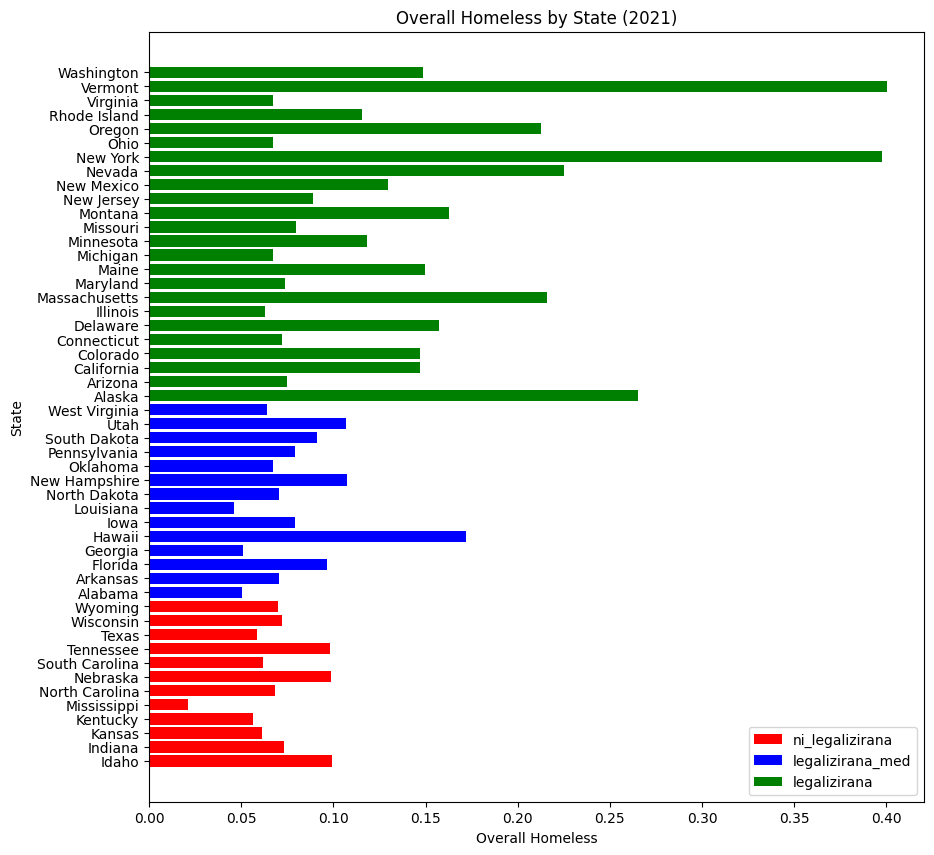

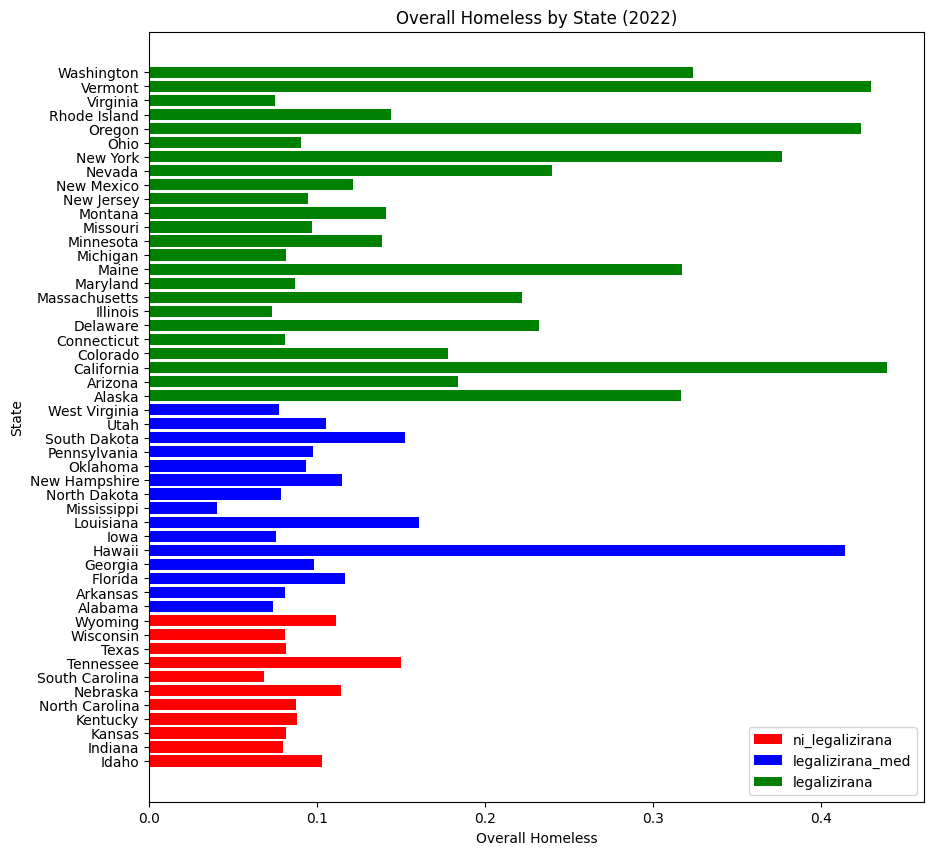

In [8]:
cmap = {
    'legalizirana': 'green',
    'legalizirana_med': 'blue',
    'legalizirana_rec': 'yellow',
    'ni_legalizirana': 'red'
}

def plot_graph(year):
    data = dict_homeless[year]
    state_names = [item[0] for item in data]
    overall_homeless = [item[1] for item in data]
    categories = [item[2] for item in data]

    # Seznam edinstvenih kategorij
    unique_categories = list(set(categories))

    plt.figure(figsize=(10, 10))

    #  podatke glede na kategorije in nato nariši stolpce
    for category in unique_categories:
        indices = [i for i, x in enumerate(categories) if x == category]
        plt.barh([state_names[i] for i in indices], [overall_homeless[i] for i in indices], color=cmap[category])

    plt.xlabel('Overall Homeless')
    plt.ylabel('State')
    plt.title(f'Overall Homeless by State ({year})')
    plt.legend(unique_categories)
    plt.show()

#  graf za vsako leto
for year in dict_homeless.keys():
    plot_graph(year)



Percentage of homeless by category: - 
Year: 2007, legalizirana: 0.36%
Year: 2008, legalizirana: 0.33%
Year: 2009, legalizirana: 0.34%
Year: 2010, legalizirana: 0.34%
Year: 2011, legalizirana: 0.30%
Year: 2012, legalizirana: 0.30%
Year: 2013, legalizirana: 0.25%
Year: 2014, legalizirana: 0.26%
Year: 2015, legalizirana: 0.27%
Year: 2016, legalizirana: 0.29%
Year: 2017, legalizirana: 0.28%
Year: 2018, legalizirana: 0.30%
Year: 2019, legalizirana: 0.28%
Year: 2020, legalizirana: 0.30%
Year: 2021, legalizirana: 0.15%
Year: 2022, legalizirana: 0.32%

Percentage of homeless by category: - 
Year: 2007, legalizirana_med: 0.46%
Year: 2008, legalizirana_med: 0.45%
Year: 2009, legalizirana_med: 0.43%
Year: 2010, legalizirana_med: 0.43%
Year: 2011, legalizirana_med: 0.45%
Year: 2012, legalizirana_med: 0.45%
Year: 2013, legalizirana_med: 0.11%
Year: 2014, legalizirana_med: 0.10%
Year: 2015, legalizirana_med: 0.11%
Year: 2016, legalizirana_med: 0.12%
Year: 2017, legalizirana_med: 0.07%
Year: 2018, 

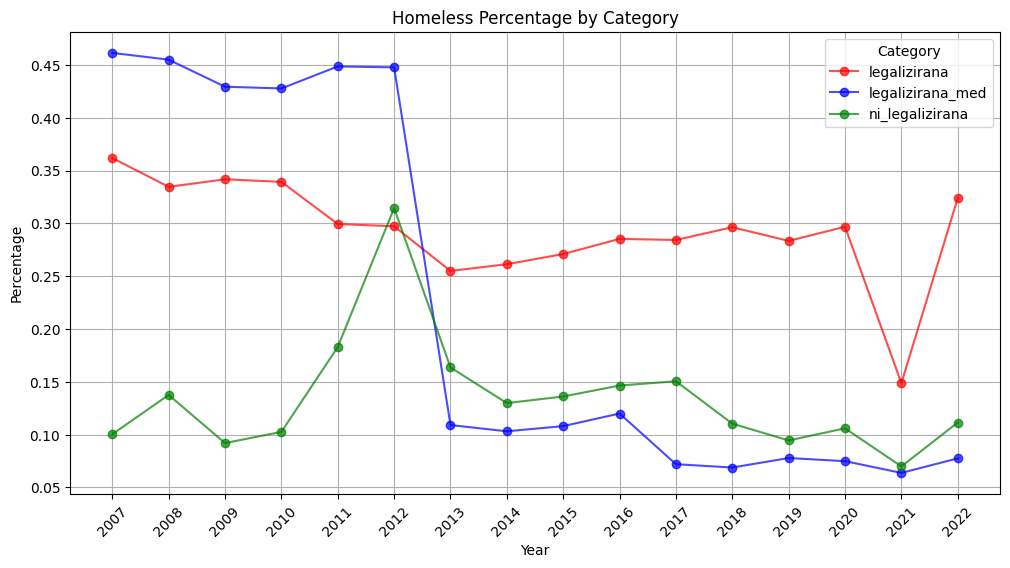

In [9]:
for year, data_list in dict_homeless.items():
    categories = {}
    for data in data_list:
        state_name, percentage, category = data
        if category not in categories:
            categories[category] = 0
        categories[category] += percentage


scatter_data = {category: {year: 0 for year in dict_homeless.keys()} for category in categories.keys()}


for year, data_list in dict_homeless.items():
    for data in data_list:
        state_name, percentage, category = data
        scatter_data[category][year] = percentage


colors = ['red', 'blue', 'green', 'orange', 'purple']

# Create scatter plot
plt.figure(figsize=(12, 6))

for i, category in enumerate(categories.keys()):
    x = list(scatter_data[category].keys())
    y = list(scatter_data[category].values())

    plt.plot(x, y, label=category, color=colors[i], alpha=0.7, marker='o')

    # Print homeless count for each year and category
    print(f"\nPercentage of homeless by category: - ")
    for year, percentage in scatter_data[category].items():
        print(f"Year: {year}, {category}: {percentage:.2f}%")

plt.title("Homeless Percentage by Category")
plt.xlabel("Year")
plt.ylabel("Percentage")
plt.xticks(list(dict_homeless.keys()), rotation=45)
plt.legend(title="Category")
plt.grid(True)
plt.show()


In [10]:

seznam_drzav = df_states["State"].tolist()
def plot_graph(zeljeni_state):
    plt.figure(figsize=(12, 8))
    for year in range(2007, 2023):
        data = dict_homeless[year]
        state_names = [item[0] for item in data if item[0] == zeljeni_state]
        overall_homeless = [item[1] for item in data if item[0] == zeljeni_state]
        categories = [item[2] for item in data if item[0] == zeljeni_state]

        # Seznam edinstvenih kategorij
        unique_categories = list(set(categories))

        # podatke glede na kategorije in nato nariši stolpce
        for category in unique_categories:
            indices = [i for i, x in enumerate(categories) if x == category]
            plt.bar(year, sum([overall_homeless[i] for i in indices]), color=cmap[category], label=category)

    plt.xlabel('Year')
    plt.ylabel('Homelessness Rate (%)')
    plt.title(f'Homelessness Rate in {zeljeni_state} by Legalization Category Over the Years')
    plt.xticks(range(2007, 2023), rotation=45)
    plt.tight_layout()
    plt.show()

# Ustvari izbirnik držav
state_dropdown = widgets.Dropdown(
    options=['Hawaii', 'Washington', 'Idaho'],  # Dopolnite z vsemi državami, ki jih želite vključiti
    value='Hawaii',
    description='State:',
    disabled=False,
)

state_dropdown = widgets.Dropdown(
    options=seznam_drzav,
    value='Hawaii',
    description='State:',
    disabled=False,
)

# Poveži funkcijo plot_graph z izbirnikom držav
widgets.interactive(plot_graph, zeljeni_state=state_dropdown)


interactive(children=(Dropdown(description='State:', index=7, options=('California', 'Alaska', 'Nevada', 'Oreg…

### PRIKAZ ŠTEVILA NEZAPOSLENIH GLEDE NA LETO IN KATEGORIJO LEGALIZACIJE

In [21]:

unemployment_data = r"podatki/unemployment.csv"
unemployment_df = pd.read_csv(unemployment_data)

dict_unemployment = {}
for index_unemployment, row_unemployment in unemployment_df.iterrows():
    year = row_unemployment["Year"]
    state_code_unemployment = row_unemployment["State"]
    unemployment_rate = row_unemployment["Unemployment_rate"]
    
    for k, v in legalization_dict.items():
        for element in v["ni_legalizirana"] + v["legalizirana_med"] + v["legalizirana_rec"] + v["legalizirana"]:
            state_name = element[0]
            state_code = element[1]
            if state_code == state_code_unemployment:
                if year not in dict_unemployment:
                    dict_unemployment[year] = []
                dict_unemployment[year].append([state_name, unemployment_rate, k])

#print("Vsebina datoteke 'unemployment.csv':")
#print(unemployment_df.head())

for year in range(2000, 2023):
    dict_unemployment[year] = []
    unemployment_df = pd.read_csv(unemployment_data)
    for index_unemployment, row_unemployment in unemployment_df.iterrows():
        unemployment_year = row_unemployment["Year"]
        state_code_unemployment = row_unemployment["State"]
        unemployment_rate = row_unemployment["Unemployment_rate"]
        
        if unemployment_year == year:
            for k, v in legalization_dict[year].items():
                for element in v:
                    state_name = element[0]
                    state_code = element[1]
                    if state_code == state_code_unemployment:
                        dict_unemployment[year].append([state_name, unemployment_rate, k])

#print("\nPodatki o brezposelnosti po letih:")
#for year, data in dict_unemployment.items():
 #   print(f"Leto {year}:")
 #   for entry in data:
   #     print(f"   Država: {entry[0]}, Stopnja brezposelnosti: {entry[1]}, Kategorija legalizacije: {entry[2]}")

In [23]:
cmap = {
    'legalizirana': 'green',
    'legalizirana_med': 'blue',
    'legalizirana_rec': 'yellow',
    'ni_legalizirana': 'red'
}

def plot_graph(year):
    data = dict_unemployment[year]
    state_names = [item[0] for item in data]
    overall_homeless = [item[1] for item in data]
    categories = [item[2] for item in data]

    # Seznam edinstvenih kategorij
    unique_categories = list(set(categories))

    plt.figure(figsize=(10, 10))

    for category in unique_categories:
        indices = [i for i, x in enumerate(categories) if x == category]
        plt.barh([state_names[i] for i in indices], [overall_homeless[i] for i in indices], color=cmap[category])

    plt.xlabel('Overall Unemployment')
    plt.ylabel('State')
    plt.title(f'Overall Unemployment by State ({year})')
    plt.legend(unique_categories)
    plt.show()


for year in dict_unemployment.keys():
    plot_graph(year)


Dropdown(description='Year:', options=(2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011,…


Unemployment rate by category: - 
Year: 2000, legalizirana: 5.10%
Year: 2001, legalizirana: 6.00%
Year: 2002, legalizirana: 7.10%
Year: 2003, legalizirana: 7.20%
Year: 2004, legalizirana: 6.30%
Year: 2005, legalizirana: 5.60%
Year: 2006, legalizirana: 5.00%
Year: 2007, legalizirana: 4.60%
Year: 2008, legalizirana: 5.20%
Year: 2009, legalizirana: 8.30%
Year: 2010, legalizirana: 9.10%
Year: 2011, legalizirana: 8.50%
Year: 2012, legalizirana: 7.70%
Year: 2013, legalizirana: 6.60%
Year: 2014, legalizirana: 5.90%
Year: 2015, legalizirana: 5.40%
Year: 2016, legalizirana: 5.20%
Year: 2017, legalizirana: 4.60%
Year: 2018, legalizirana: 4.40%
Year: 2019, legalizirana: 4.20%
Year: 2020, legalizirana: 8.50%
Year: 2021, legalizirana: 5.20%
Year: 2022, legalizirana: 4.20%

Unemployment rate by category: - 
Year: 2000, legalizirana_med: 4.20%
Year: 2001, legalizirana_med: 4.30%
Year: 2002, legalizirana_med: 4.00%
Year: 2003, legalizirana_med: 3.90%
Year: 2004, legalizirana_med: 3.30%
Year: 2005, le

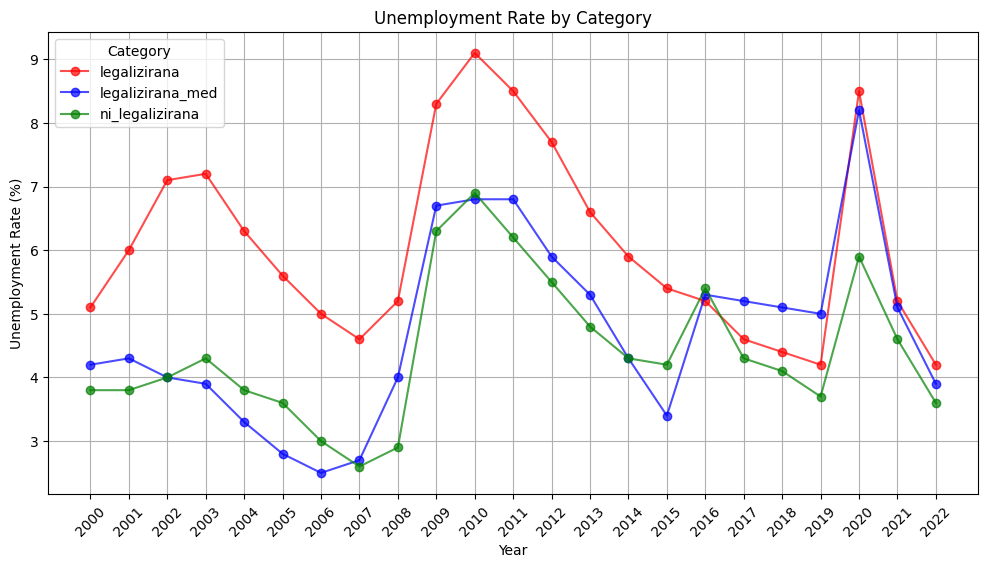

In [13]:
plt.figure(figsize=(12, 6))

for i, category in enumerate(categories.keys()):
    scatter_data_unemployment = {year: 0 for year in dict_unemployment.keys()}
    for year, data_list in dict_unemployment.items():
        for data in data_list:
            state_name, unemployment_rate, legalization_category = data
            if legalization_category == category:
                scatter_data_unemployment[year] = unemployment_rate
    
    x = list(scatter_data_unemployment.keys())
    y = list(scatter_data_unemployment.values())

    plt.plot(x, y, label=category, color=colors[i], alpha=0.7, marker='o')

    # unemployment rate for each year and category
    print(f"\nUnemployment rate by category: - ")
    for year, rate in scatter_data_unemployment.items():
        print(f"Year: {year}, {category}: {rate:.2f}%")

plt.title("Unemployment Rate by Category")
plt.xlabel("Year")
plt.ylabel("Unemployment Rate (%)")
plt.xticks(list(dict_unemployment.keys()), rotation=45)
plt.legend(title="Category")
plt.grid(True)
plt.show()


In [14]:
def plot_graph(zeljeni_state):
    plt.figure(figsize=(12, 8))

    # Ustvari prazen seznam za legendo
    handles = []

    for year in range(2000, 2023):
        if year in dict_unemployment:
            data = dict_unemployment[year]
            state_names = [item[0] for item in data if item[0] == zeljeni_state]
            overall_unemployment = [item[1] for item in data if item[0] == zeljeni_state]
            categories = [item[2] for item in data if item[0] == zeljeni_state]

            # Seznam edinstvenih kategorij
            unique_categories = list(set(categories))

            # podatke glede na kategorije in nato nariši stolpce
            for category in unique_categories:
                indices = [i for i, x in enumerate(categories) if x == category]
                bar = plt.bar(year, sum([overall_unemployment[i] for i in indices]), color=cmap[category], label=category)
                # Dodajte vsak stolpec v legendo samo enkrat
                if year == 2000:
                    handles.append(bar[0])

    # Ustvari prilagojeno legendo
    custom_legend = [plt.Line2D([0], [0], color=cmap[category], lw=4, label=category) for category in cmap]
    plt.legend(handles=custom_legend, loc='upper left')

    plt.xlabel('Year')
    plt.ylabel('Unemployment Rate (%)')
    plt.title(f'Unemployment Rate in {zeljeni_state} by Legalization Category Over the Years')
    plt.xticks(range(2000, 2023), rotation=45)
    plt.tight_layout()
    plt.show()

# Ustvari izbirnik držav
state_dropdown = widgets.Dropdown(
    options=seznam_drzav,
    value='Hawaii',
    description='State:',
    disabled=False,
)

# Poveži funkcijo plot_graph z izbirnikom držav
widgets.interactive(plot_graph, zeljeni_state=state_dropdown)

interactive(children=(Dropdown(description='State:', index=7, options=('California', 'Alaska', 'Nevada', 'Oreg…

### PRIKAZ KRIMINALA GLEDE NA LETO IN KATEGORIJO LEGALIZACIJE


kategorija za vse crime za vse crime skozi leta

In [15]:
import pandas as pd

dict_crime = {}

crime_csv = r"podatki/crime.csv"
df_crime = pd.read_csv(crime_csv)

# Zanka za vsako leto od 2000 do 2022
for i in range(2000, 2023):
    dict_crime[i] = []  
    
    df_year = df_crime[df_crime["Year"] == i]
    
    for index, row in df_year.iterrows():
        state = row["State"]
        code = row["Code"]
        year = row["Year"]
        total = row["Total Crimes"]
  
        if year == i and year <= 2019 and isinstance(code, str):
            št_prebivalcev = populacija(code, year)
            procentno = (int(total) / št_prebivalcev) * 100

        if i in legalization_dict:
            for k, v in legalization_dict[i].items():
                for element in v:
                    state_name = element[0]
                    state_code = element[1]
                    if state_code == code:
                        dict_crime[i].append([state_name, procentno, k])


### PRIKAZ POVEZAVE MED BREZDOMSTVOM IN BREZPOSELNOST

Korelacijski koeficient: 0.55


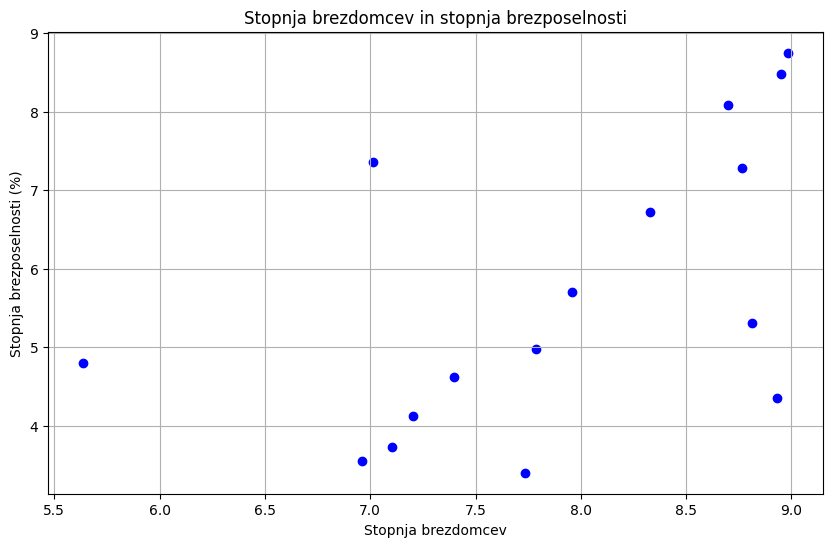

In [16]:
years = []
homeless = []
unemployment = []


for year in dict_homeless:
    years.append(int(year))
    homeless.append(sum(item[1] for item in dict_homeless[year]))
    unemployment.append(sum(entry[1] for entry in dict_unemployment[int(year)]) / 50)


correlation_coefficient = np.corrcoef(homeless, unemployment)[0, 1]
print(f'Korelacijski koeficient: {correlation_coefficient:.2f}')


plt.figure(figsize=(10, 6))
plt.scatter(homeless, unemployment, color='blue')
plt.title('Stopnja brezdomcev in stopnja brezposelnosti')
plt.xlabel('Stopnja brezdomcev')
plt.ylabel('Stopnja brezposelnosti (%)')
plt.grid(True)
plt.show()


### PRIKAZ POVEZAVE MED BREZDOMSTVOM IN KRIMINALOM

Korelacijski koeficient: 0.94


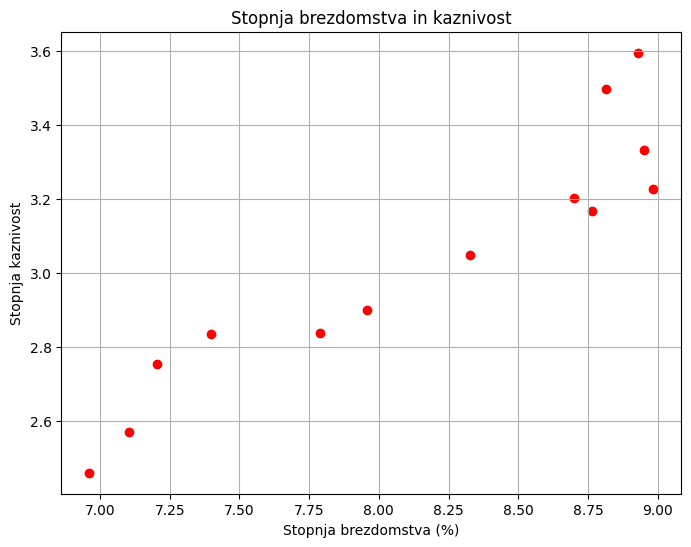

In [17]:
homeless = []
crime = []


for year in dict_homeless:
    if int(year) in range(2007, 2020):
        homeless.append(sum(item[1] for item in dict_homeless[year]))
        crime.append(sum(entry[1] for entry in dict_crime[year]) / 50)


correlation_coefficient_homelessness_crime = np.corrcoef(homeless, crime)[0, 1]
print(f'Korelacijski koeficient: {correlation_coefficient_homelessness_crime:.2f}')

plt.figure(figsize=(8, 6))
plt.scatter(homeless, crime, color='red')
plt.title('Stopnja brezdomstva in kaznivost')
plt.xlabel('Stopnja brezdomstva (%)')
plt.ylabel('Stopnja kaznivost')
plt.grid(True)

plt.show()


### PRIKAZ POVEZAVE MED BREZPOSELNOSTJO IN KRIMINALOM

Korelacijski koeficient: 0.43


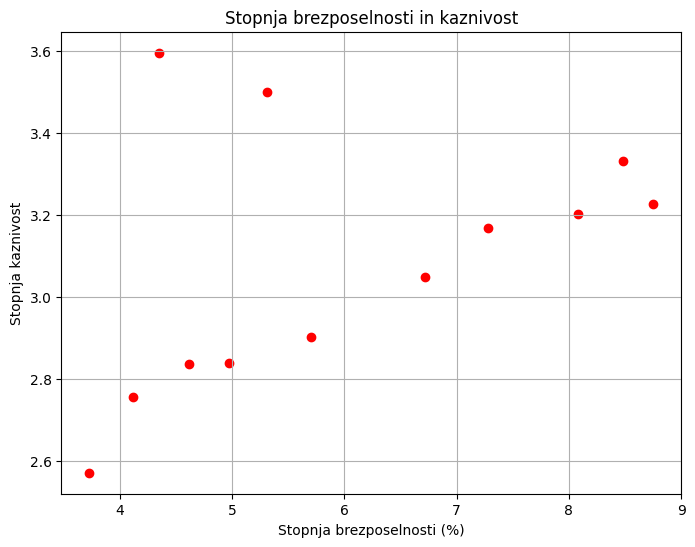

In [18]:
unemployment = []
crime = []


for year in dict_homeless:
    if int(year) in range(2000, 2019):
        homeless.append(sum(item[1] for item in dict_homeless[year]))
        unemployment.append(sum(entry[1] for entry in dict_unemployment[year]) / 50)
        crime.append(sum(entry[1] for entry in dict_crime[year]) / 50)

# korelacijske koeficiente
correlation_coefficient_unemployment_crime = np.corrcoef(unemployment, crime)[0, 1]
print(f'Korelacijski koeficient: {correlation_coefficient_unemployment_crime:.2f}')

plt.figure(figsize=(8, 6))
plt.scatter(unemployment, crime, color='red')
plt.title('Stopnja brezposelnosti in kaznivost')
plt.xlabel('Stopnja brezposelnosti (%)')
plt.ylabel('Stopnja kaznivost')
plt.grid(True)

plt.show()
